In [1]:
# start a spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ALS100").getOrCreate()

24/04/28 13:01:56 WARN Utils: Your hostname, ZOU.local resolves to a loopback address: 127.0.0.1; using 100.72.44.48 instead (on interface en0)
24/04/28 13:01:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/28 13:01:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# set the log level to ERROR
spark.sparkContext.setLogLevel("ERROR")

In [3]:
import pandas as pd
best_predictions_10_pd = pd.read_parquet("/Users/ZOU/best_predictions_10.parquet")
best_predictions_20_pd = pd.read_parquet("/Users/ZOU/best_predictions_20.parquet")
best_predictions_50_pd = pd.read_parquet("/Users/ZOU/best_predictions_50.parquet")
best_predictions_80_pd = pd.read_parquet("/Users/ZOU/best_predictions_80.parquet")
best_predictions_100_pd = pd.read_parquet("/Users/ZOU/best_predictions_100_probability.parquet")

In [5]:
cold_users_pd = pd.read_parquet("/Users/ZOU/cold_start_business_test.parquet")

In [7]:
# show the first 5 rows of the cold_users_pd
cold_users_pd.head(5)


,business,user,rating,avg_rating,num_of_reviews,rating_binary
100,0x7c006df045b01715:0xe945c308688e1a46,108987222510243129876,5.0,5.0,1,1
101,0x7c006df045b01715:0xe945c308688e1a46,108987222510243129876,5.0,5.0,1,1
290,0x79530ace67ee62b5:0xef6d8b0c8ee1cf79,108983172705985692157,5.0,5.0,1,1
291,0x79530ace67ee62b5:0xef6d8b0c8ee1cf79,108983172705985692157,5.0,5.0,1,1
952,0x7c0059925bcc0001:0xb9aef75e434b68a9,108974359473114635842,5.0,5.0,1,1


In [9]:
# get all the data from the best_predictions_100_pd, where user = 108987222510243129876
user_100_pd = best_predictions_100_pd[best_predictions_100_pd['user'] == '108987222510243129876']
user_100_pd.head(5)


,business,user,rating,avg_rating,num_of_reviews,rating_binary,business_id,user_id,prediction,prediction_binary,probability
34009,0x7c006e6643b4ca0b:0xf16b211ca4cc1c64,108987222510243129876,5.0,4.6,34,1,6312.0,23318.0,0.110652,1,0.275629


In [11]:
# get all the data from the best_predictions_100_pd, where user_id = 99416
user_100_pd_2 = best_predictions_100_pd[best_predictions_100_pd['user_id'] == 2999.0]
user_100_pd_2.head(5)

,business,user,rating,avg_rating,num_of_reviews,rating_binary,business_id,user_id,prediction,prediction_binary,probability
0,0x7c006dede4a406b3:0x328c1ae0697b7359,116580727998148227828,5.0,4.2,5279,1,6.0,2999.0,0.664186,1,0.691896
14670,0x7c006a43aea0fc85:0x2df8c228319c2b5d,116580727998148227828,5.0,4.6,128,1,2335.0,2999.0,0.819046,1,0.808353
35607,0x7c0041f27f4bb7d3:0x3409b6cb646fc2fe,116580727998148227828,5.0,4.7,1183,1,71.0,2999.0,0.917894,1,0.882689
37459,0x7c006b1e1afc35ed:0x108b16655468a3a2,116580727998148227828,5.0,5.0,5,1,11582.0,2999.0,0.903927,1,0.872185
70899,0x7c006b053a0cf397:0x8574a7e94db6f357,116580727998148227828,5.0,4.2,1407,1,57.0,2999.0,0.694447,1,0.714653


In [13]:
train_final_pd_10 = pd.read_parquet("/Users/ZOU/文件/课程/ST446/作业/final data/train_10.parquet")
test_final_pd_10 = pd.read_parquet("/Users/ZOU/文件/课程/ST446/作业/final data/test_10.parquet")


In [14]:

# Assuming test_final_pd_10 and train_final_pd_10 are already loaded as DataFrames

# Retrieve all unique user_ids from the training set
train_user_ids = set(train_final_pd_10['user_id'].unique())

# Filter out user_ids in the test set that are not present in the train_user_ids, and store them as a list
new_user_ids_in_test = list(test_final_pd_10.loc[~test_final_pd_10['user_id'].isin(train_user_ids), 'user_id'].unique())

# Calculate the length of the list containing new user_ids
length_of_new_user_ids = len(new_user_ids_in_test)

# Print the number of unique user_ids that are in the test set but not in the train set
print("Number of unique user_ids in test set not present in train set:", length_of_new_user_ids)

Number of unique user_ids in test set not present in train set: 7921


In [22]:
# user_ids in the test set and present in the train_user_ids
not_new = list(test_final_pd_10.loc[test_final_pd_10['user_id'].isin(train_user_ids), 'user_id'].unique())
not_new[:5]

[226.0, 3989.0, 10553.0, 170.0, 13902.0]

In [15]:
# get 5 user_ids from the list of new_user_ids_in_test
new_user_ids_in_test[:5]

[78901.0, 92258.0, 48432.0, 36041.0, 16959.0]

In [19]:
# get all the data from the best_predictions_10_pd, where user = 78901.0
user_10_pd = best_predictions_10_pd[best_predictions_10_pd['user_id'] == 78901.0]
user_10_pd

,business,user,rating,avg_rating,num_of_reviews,rating_binary,business_id,user_id,prediction,prediction_binary,probability


In [20]:
user_10_pd_2 = best_predictions_10_pd[best_predictions_10_pd['user_id'] == 92258.0]
user_10_pd_2

,business,user,rating,avg_rating,num_of_reviews,rating_binary,business_id,user_id,prediction,prediction_binary,probability


In [24]:
user_10_pd_3 = best_predictions_10_pd[best_predictions_10_pd['user_id'] == 226.0]
user_10_pd_3

,business,user,rating,avg_rating,num_of_reviews,rating_binary,business_id,user_id,prediction,prediction_binary,probability
376,0x13fe1b6093c875a1:0xf1906975dade6649,113177410817132352739,5.0,4.0,58,1,3403.0,226.0,-0.060843,0,0.216765
1636,0x7c006e6e74fcfc57:0x9038f83e35fe775c,113177410817132352739,4.0,4.3,188,0,1843.0,226.0,0.358003,1,0.558119


In [25]:
# how many rows are test_final_pd_10
len(test_final_pd_10)

12600

In [26]:
# how many rows are in the best_predictions_10_pd
len(best_predictions_10_pd)

4465

In [27]:
# if NA in test_final_pd_10
test_final_pd_10.isna().sum()
train_final_pd_10.isna().sum()

business          0
user              0
rating            0
avg_rating        0
num_of_reviews    0
rating_binary     0
business_id       0
user_id           0
dtype: int64

In [28]:
# count how many user only appear once in the test_final_pd_10
test_final_pd_10['user_id'].value_counts().value_counts()

1    11371
2      456
3       87
4       10
5        2
6        1
Name: user_id, dtype: int64

In [4]:
# count how many business_id only appear once in the best_predictions_100_pd when prediction_binary = 1, store as dictionary
business_count = best_predictions_100_pd[best_predictions_100_pd['prediction_binary'] == 1]['business_id'].value_counts().to_dict()

In [5]:
train_final_pd_100 = pd.read_parquet("/Users/ZOU/文件/课程/ST446/作业/final data/train_100.parquet")
test_final_pd_100 = pd.read_parquet("/Users/ZOU/文件/课程/ST446/作业/final data/test_100.parquet")

In [6]:
# calculate how many times the business_id appears in the train_final_pd_10, set as dictionary
business_count_train = train_final_pd_100['business_id'].value_counts().to_dict()


In [42]:
# check if business_count_train has value = 0
for key in business_count_train.keys():
    if business_count_train[key] == 0:
        print(key)

In [46]:
# calculate the precentage of the business_id appearing in the train_final_pd_10 and the best_predictions_100_pd
business_probability = {}
for key in business_count.keys():
    business_probability[key] = business_count[key] / business_count_train[key]


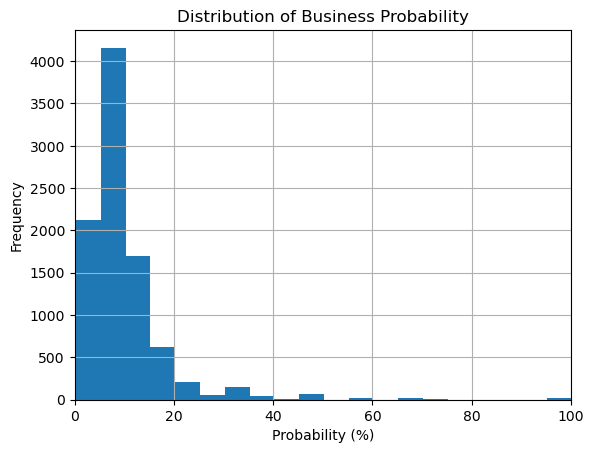

In [49]:
# plot the distribution of the business_probability
import matplotlib.pyplot as plt
# convert the value of business_probability to a precentage
business_probability_pd = pd.Series(business_probability) * 100
business_probability_pd.hist(bins=100)
plt.xlabel('Probability (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Business Probability')
plt.xlim(0, 100)
plt.show()

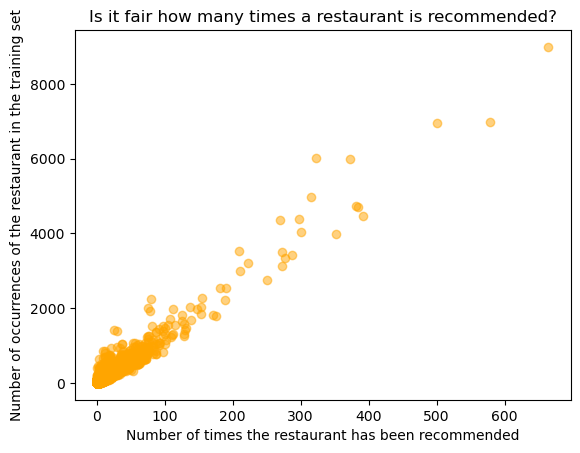

In [11]:
import matplotlib.pyplot as plt
# x is business_count, y is business_count_train, they have same key
# draw scatter plot
x = []
y = []
for key in business_count.keys():
    x.append(business_count[key])
    y.append(business_count_train[key])

plt.scatter(x, y, alpha=0.5, color = 'orange')
plt.xlabel('Number of times the restaurant has been recommended')
plt.ylabel('Number of occurrences of the restaurant in the training set')
plt.title('Is it fair how many times a restaurant is recommended?')
plt.show()
